<a href="https://colab.research.google.com/github/tranly-dev/Banking-operation-SQL/blob/main/Customer-churn-prediction./notebooks/customer_bankingchurn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🏦 Customer Churn Analysis
Phân tích dữ liệu khách hàng rời bỏ ngân hàng nhằm:
- Tìm hiểu đặc điểm nhóm khách hàng **churn** (rời đi) so với **non-churn**.
- Xây dựng nền tảng cho mô hình dự đoán churn.

## 1️⃣ Import libraries
Các thư viện chính:
- `pandas`, `numpy`: xử lý dữ liệu.
- `matplotlib`, `seaborn`: trực quan hóa dữ liệu.


In [1]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Hiển thị trực quan đẹp hơn
plt.style.use('seaborn-v0_8')
sns.set_palette("Set2")

# Cấu hình hiển thị
pd.set_option('display.max_columns', None)


## 2️⃣ Load dataset
Dữ liệu nằm trong thư mục `../data/raw/Churn_Modelling.csv`.  
Mục tiêu: kiểm tra kích thước và xem qua vài dòng đầu.


In [3]:
# 2. Load dataset
data = pd.read_csv('Churn_Modelling.csv')

print("Kích thước dữ liệu:", data.shape)
data.head()


Kích thước dữ liệu: (10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## 3️⃣ Kiểm tra dữ liệu tổng quan
- Kiểm tra thông tin các cột (`info()`).
- Thống kê mô tả (`describe()`).
- Kiểm tra giá trị bị thiếu (`isnull()`).


In [4]:
# 3. Kiểm tra dữ liệu tổng quan
data.info()
print("\nThống kê mô tả:")
display(data.describe())

# Kiểm tra giá trị null
print("\nSố lượng giá trị bị thiếu mỗi cột:")
print(data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB

Thống kê mô tả:


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000



Số lượng giá trị bị thiếu mỗi cột:
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


## 4️⃣ Phân tích sơ bộ

Trong phần này, chúng ta thực hiện **phân tích khám phá dữ liệu (EDA)** để hiểu rõ hơn về đặc điểm khách hàng và hành vi rời bỏ (churn).

**Mục tiêu:**
- Tính tỷ lệ khách hàng churn tổng thể.
- Trực quan hóa churn theo **giới tính**, **quốc gia**, và **độ tuổi**.
- Quan sát phân phối các biến chính trong dataset.


Tỉ lệ churn:
Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64


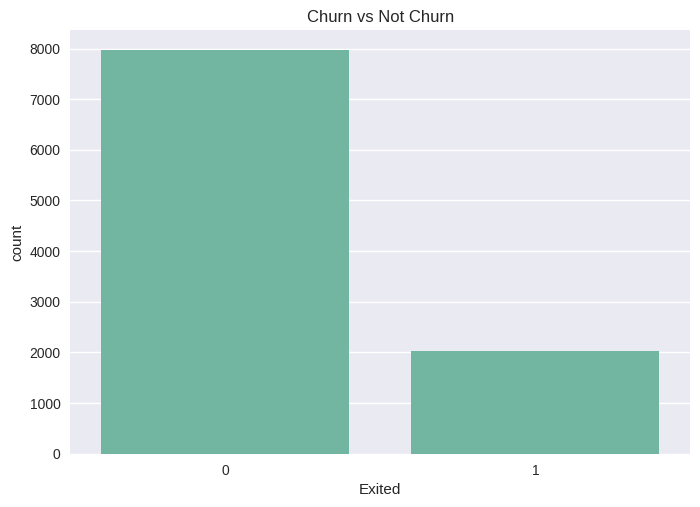

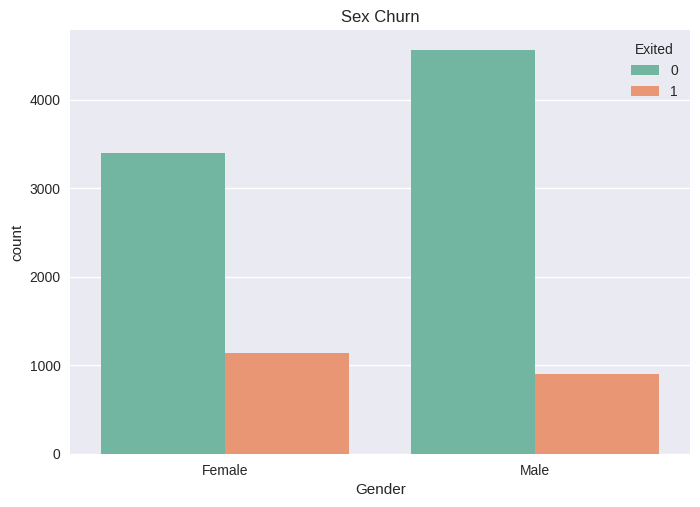

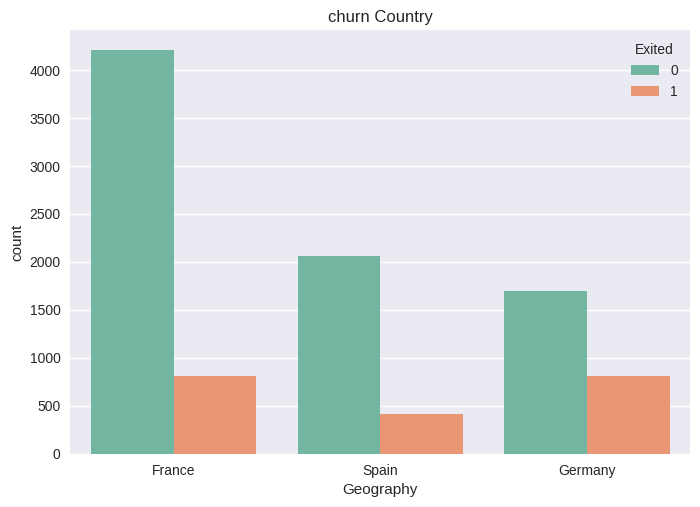

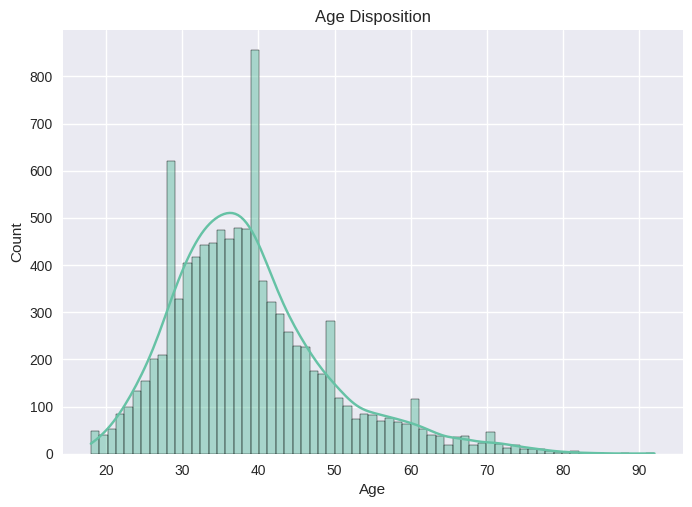

In [9]:
# 4. Phân tích sơ bộ
# Tỉ lệ churn
churn_rate = data['Exited'].value_counts(normalize=True)
print("Tỉ lệ churn:")
print(churn_rate)

# Biểu đồ phân bố churn
sns.countplot(x='Exited', data=data)
plt.title('Churn vs Not Churn')
plt.show()

# Churn theo giới tính
sns.countplot(x='Gender', hue='Exited', data=data)
plt.title('Sex Churn')
plt.show()

# Churn theo quốc gia
sns.countplot(x='Geography', hue='Exited', data=data)
plt.title('churn Country')
plt.show()

# Phân phối tuổi
sns.histplot(data['Age'], kde=True)
plt.title('Age Disposition')
plt.show()


## 5️⃣ Phân tích tương quan giữa các biến số

Mục tiêu:
- Xem xét mối tương quan giữa các biến định lượng (như `CreditScore`, `Age`, `Balance`, `EstimatedSalary`, …).
- Tìm hiểu những đặc điểm có thể ảnh hưởng mạnh đến biến mục tiêu `Exited`.

Chúng ta sẽ dùng **ma trận tương quan (correlation matrix)** và **biểu đồ nhiệt (heatmap)** để trực quan hóa.


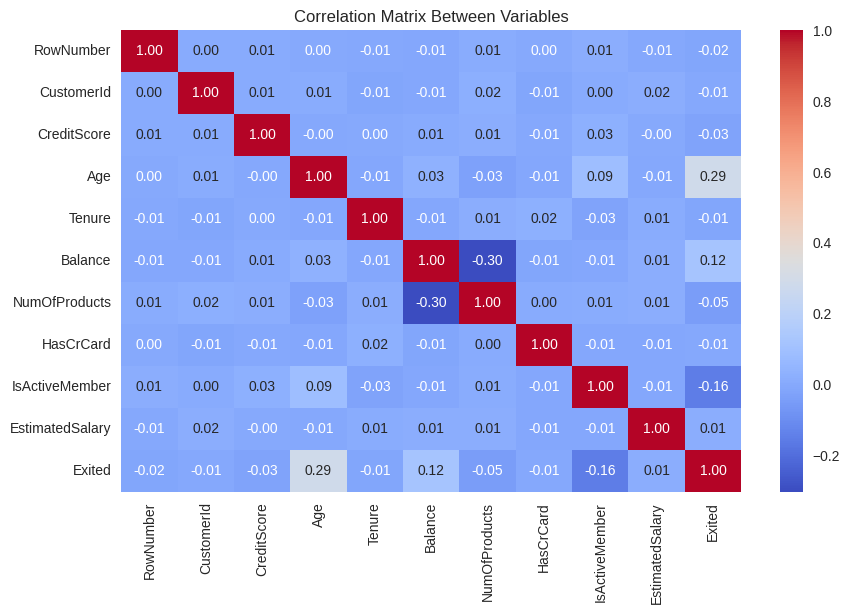

In [10]:
# 5. Phân tích tương quan giữa các biến số
corr = data.corr(numeric_only=True)
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Between Variables")
plt.show()


## 6️⃣ Nhận xét sơ bộ sau EDA

Dựa trên các biểu đồ và thống kê ở trên, ta rút ra một số nhận xét nhanh về dữ liệu.


In [7]:
# 6. Nhận xét sơ bộ
print("""
🔹 Dataset gồm khoảng 10k khách hàng, 14 cột đặc trưng.
🔹 Biến mục tiêu: Exited (1 = Churn, 0 = Retained).
🔹 Dữ liệu khá sạch, không có missing values.
🔹 Các yếu tố ảnh hưởng lớn đến churn: Age, CreditScore, IsActiveMember, Geography.
""")



🔹 Dataset gồm khoảng 10k khách hàng, 14 cột đặc trưng.
🔹 Biến mục tiêu: Exited (1 = Churn, 0 = Retained).
🔹 Dữ liệu khá sạch, không có missing values.
🔹 Các yếu tố ảnh hưởng lớn đến churn: Age, CreditScore, IsActiveMember, Geography.



### 📌 Tổng kết ban đầu

- Dataset gồm khoảng **10.000 khách hàng**, **14 cột đặc trưng**.  
- Biến mục tiêu: **Exited**  
  - 1 → khách hàng **rời đi (Churn)**  
  - 0 → khách hàng **ở lại (Retained)**  
- Dữ liệu **khá sạch**, không có missing values.  
- Một số yếu tố có thể ảnh hưởng lớn đến khả năng churn:
  - `Age`, `CreditScore`, `IsActiveMember`, `Geography`.


# Task
Develop and evaluate a churn prediction model by:
1.  Preprocessing the `data` DataFrame, including One-Hot Encoding for 'Geography' and 'Gender', and dropping 'RowNumber', 'CustomerId', 'Surname'.
2.  Splitting the preprocessed data into training and testing sets, with 'Exited' as the target variable.
3.  Training a classification model (e.g., RandomForestClassifier) on the training data.
4.  Evaluating the model's performance on the test set using metrics like Accuracy, Precision, Recall, F1-score, ROC AUC, and displaying a confusion matrix.
5.  Summarizing the key results and outlining potential next steps for the churn prediction model.

## Tiền xử lý dữ liệu

### Subtask:
Xử lý các biến phân loại (`Geography`, `Gender`) bằng cách sử dụng One-Hot Encoding. Đồng thời, loại bỏ các cột không cần thiết như `RowNumber`, `CustomerId`, `Surname` và tách biến mục tiêu `Exited` khỏi các biến độc lập.


**Reasoning**:
First, I will apply one-hot encoding to the categorical features 'Geography' and 'Gender' using `pd.get_dummies` to convert them into numerical representations, while also dropping the original columns to avoid multicollinearity. The results will be stored in a new DataFrame called `data_processed`.



In [11]:
data_processed = pd.get_dummies(data, columns=['Geography', 'Gender'], drop_first=True)

**Reasoning**:
Now that one-hot encoding has been applied, I will remove the unnecessary columns 'RowNumber', 'CustomerId', and 'Surname' from the `data_processed` DataFrame as specified in the subtask instructions.



In [12]:
data_processed = data_processed.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

**Reasoning**:
To prepare the data for model training, I will now separate the features (independent variables) from the target variable (dependent variable). The `X` DataFrame will contain all columns from `data_processed` except 'Exited', and `y` will contain only the 'Exited' column, as per the subtask instructions.



In [13]:
X = data_processed.drop('Exited', axis=1)
y = data_processed['Exited']

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("First 5 rows of X:")
display(X.head())
print("First 5 values of y:")
display(y.head())

Shape of X: (10000, 11)
Shape of y: (10000,)
First 5 rows of X:


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


First 5 values of y:


,Exited
0,1
1,0
2,1
3,0
4,0


## Chia tập dữ liệu

### Subtask:
Chia dữ liệu thành tập huấn luyện (training set) và tập kiểm tra (test set) để đánh giá hiệu suất của mô hình.


**Reasoning**:
To split the data into training and testing sets, I need to import the `train_test_split` function from `sklearn.model_selection`.



In [14]:
from sklearn.model_selection import train_test_split

print("Imported train_test_split successfully.")

Imported train_test_split successfully.


**Reasoning**:
Now that the `train_test_split` function is available, I will split the `X` and `y` data into training and testing sets using the specified parameters: `test_size=0.2`, `random_state=42`, and `stratify=y`. Then, I will print the shapes of the resulting sets to verify the split.



In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (8000, 11)
Shape of X_test: (2000, 11)
Shape of y_train: (8000,)
Shape of y_test: (2000,)


## Huấn luyện mô hình phân loại

### Subtask:
Sử dụng một thuật toán phân loại (ví dụ: RandomForestClassifier) để huấn luyện mô hình dự đoán churn dựa trên tập dữ liệu huấn luyện đã tiền xử lý.


**Reasoning**:
To begin training the classification model, I need to import the `RandomForestClassifier` from `sklearn.ensemble`.



In [16]:
from sklearn.ensemble import RandomForestClassifier

print("RandomForestClassifier imported successfully.")

RandomForestClassifier imported successfully.


**Reasoning**:
Now that the `RandomForestClassifier` is imported, I will initialize an instance of it with `random_state=42` and then train the model using the `fit` method on the `X_train` and `y_train` datasets.



In [17]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

print("RandomForestClassifier model trained successfully.")

RandomForestClassifier model trained successfully.
